In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix

red_wine = pd.read_csv('https://query.data.world/s/rrj4d2f6sj2apz4x7sozpd6epmrsiy')
white_wine = pd.read_csv('https://query.data.world/s/brho7trfnuy4iz2nxraqzsfwvgek5b')

high_quality = white_wine.loc[ white_wine['quality'] > 6 ]   #ratings 9, 8, 7 only, 1060 rows
mid_quality_initial = white_wine.loc[ white_wine['quality'] < 7 ]
mid_quality = mid_quality_initial.loc[ mid_quality_initial['quality'] > 4 ]   #ratings 5, 6 only, 3655 rows
low_quality = white_wine.loc[ white_wine['quality'] < 5 ]   #ratings 3, 4 only, 183 rows
mid_and_low_quality = white_wine.loc[ white_wine['quality'] < 7 ]   #ratings 3, 4, 5, 6 only, 3838 rows

In [2]:
#Knn classifier
from sklearn.neighbors import KNeighborsClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ks = [2,3,4,5,6,7]

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")

For a k value = 2 : 
[[  1   0   2   1   1   0   0]
 [  2   9   9   4   1   0   0]
 [  2  11 205  69   3   1   0]
 [  0  17 165 212  32   6   0]
 [  2   8  40  81  59   2   0]
 [  0   1   4  18   8   4   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 490.
For a k value = 3 : 
[[  1   0   2   1   1   0   0]
 [  2   3  11   7   2   0   0]
 [  1  12 156  97  21   4   0]
 [  0  11 137 221  53  10   0]
 [  0  10  40  69  66   7   0]
 [  0   1   4  17   6   7   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 454.
For a k value = 4 : 
[[  1   0   3   0   1   0   0]
 [  1   0  14   8   2   0   0]
 [  0   7 172  87  22   3   0]
 [  0   5 128 240  49  10   0]
 [  0   3  35  87  61   6   0]
 [  0   1   2  19   7   6   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 480.
For a k value = 5 : 
[[  0   0   4   1   0   0   0]
 [  1   2  13   7   2   0   0]
 [  0   6 149 116  19   1   0]
 [  0   5 112 261  50   4   0]
 [  0   3  44  89  51   5   0]
 [  0   0   1  21

In [3]:
#knn classification taking features that seem to be strong high quality indicators
X = X_initial[ ['alcohol', 'density'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")

For a k value = 2 : 
[[  0   2   2   1   0   0   0]
 [  2   5   8   7   2   1   0]
 [  1  20 202  58   9   1   0]
 [  3  23 149 225  30   2   0]
 [  0  18  30  83  59   2   0]
 [  0   1   3  16   8   7   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 498.
For a k value = 3 : 
[[  0   0   2   3   0   0   0]
 [  2   3   9   5   5   1   0]
 [  1  15 154 103  17   1   0]
 [  1  22 106 243  55   5   0]
 [  0  15  28  66  79   4   0]
 [  0   0   1  15  11   8   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 487.
For a k value = 4 : 
[[  0   0   3   2   0   0   0]
 [  1   2  10   9   3   0   0]
 [  0   8 168  93  20   2   0]
 [  1  12 118 252  44   5   0]
 [  0   4  24  87  74   3   0]
 [  0   0   2  14  12   7   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 503.
For a k value = 5 : 
[[  0   0   3   2   0   0   0]
 [  1   1   7  11   5   0   0]
 [  0   7 172 100  12   0   0]
 [  0   5 118 264  40   5   0]
 [  0   3  24  96  67   2   0]
 [  0   0   1  19

In [4]:
#knn classification taking features that seem to be strong low quality indicators
X = X_initial[ ['free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")


For a k value = 2 : 
[[  1   0   2   2   0   0   0]
 [  1   8   8   8   0   0   0]
 [  3  16 186  72  12   2   0]
 [  2  24 164 219  21   2   0]
 [  0   3  79  69  41   0   0]
 [  0   0  12  11   8   4   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 459.
For a k value = 3 : 
[[  0   0   3   1   1   0   0]
 [  1   3  11   9   1   0   0]
 [  3  14 145 102  22   5   0]
 [  1  16 122 247  44   2   0]
 [  0   1  72  65  52   2   0]
 [  0   0  13  12   5   5   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 452.
For a k value = 4 : 
[[  1   0   2   1   1   0   0]
 [  1   2  14   7   1   0   0]
 [  0   8 149 108  25   1   0]
 [  1   7 127 260  33   4   0]
 [  0   2  69  73  46   2   0]
 [  0   0  12  14   4   5   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 463.
For a k value = 5 : 
[[  1   0   3   1   0   0   0]
 [  1   3  14   7   0   0   0]
 [  0   9 137 126  18   1   0]
 [  0   8 134 257  28   5   0]
 [  0   2  70  81  38   1   0]
 [  0   0  10  16

In [5]:
#knn classification taking features that seem to be strong all around quality indicators
X = X_initial[ ['chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ks = [2,3,4,5,6,7]

for k in ks:    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("For a k value = " + str(k) + " : ")
    print(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")


For a k value = 2 : 
[[  0   0   3   1   1   0   0]
 [  0   2  11  11   1   0   0]
 [  0  27 173  75  15   1   0]
 [  3  24 171 199  28   7   0]
 [  3  10  42  86  47   4   0]
 [  0   1   7  15   9   3   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 424.
For a k value = 3 : 
[[  0   0   2   1   2   0   0]
 [  0   2   9  12   2   0   0]
 [  2  23 126 115  22   3   0]
 [  2  20 141 218  43   8   0]
 [  3  11  37  73  62   6   0]
 [  0   1   8  12  10   4   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 412.
For a k value = 4 : 
[[  0   0   2   2   1   0   0]
 [  0   1  10  10   3   1   0]
 [  0  13 147 109  18   4   0]
 [  0  12 142 230  43   5   0]
 [  0   6  35  94  52   5   0]
 [  0   1   7  12  11   4   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 434.
For a k value = 5 : 
[[  0   0   2   2   1   0   0]
 [  0   0  10  11   4   0   0]
 [  0   6 138 130  13   4   0]
 [  1   6 134 254  33   4   0]
 [  0   0  32 105  49   6   0]
 [  0   0   6  15

The best knn classification so far is a 7 neighbor classifier on the 'alcohol' and 'density' features.

In [6]:
from sklearn import linear_model


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['newton-cg', 'sag', 'saga', 'lbfgs' ]
for solver in solvers:
    mulnom_clf = linear_model.LogisticRegression(multi_class='multinomial', solver=solver)
    mulnom_clf.fit(X_train, y_train)
    y_pred_mulnom = mulnom_clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred_mulnom, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_mulnom, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")


[[  0   0   2   2   0   1   0]
 [  0   0  14  11   0   0   0]
 [  0   0 138 151   2   0   0]
 [  1   0  91 320  20   0   0]
 [  0   0  18 138  36   0   0]
 [  0   0   2  21  12   0   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 494.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[  0   0   2   3   0   0   0]
 [  0   0   8  16   1   0   0]
 [  0   0  88 202   1   0   0]
 [  0   0  74 355   3   0   0]
 [  0   0  17 164  11   0   0]
 [  0   0   2  29   4   0   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 454.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[  0   0   2   3   0   0   0]
 [  0   0   7  17   1   0   0]
 [  0   0  84 205   2   0   0]
 [  0   0  75 354   3   0   0]
 [  0   0  17 170   5   0   0]
 [  0   0   2  32   1   0   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 443.
[[  1   0   2   2   0   0   0]
 [  0   0   7  18   0   0   0]
 [  0   0  88 202   1   0   0]
 [  0   0  75 356   1   0   0]
 [  0   0  18 170   4   0   0]
 [  0   0   2  33   0   0   0]
 [  0   0   0   0   0   0   0]]
Sum of the diagonals is: 449.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [7]:
from sklearn import linear_model

high_and_low = high_quality.append(low_quality)
X_initial = high_and_low.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = high_and_low['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

solvers = ['newton-cg', 'sag', 'saga', 'lbfgs' ]
for solver in solvers:
    mulnom_clf = linear_model.LogisticRegression(multi_class='multinomial', solver=solver)
    mulnom_clf.fit(X_train, y_train)
    y_pred_mulnom = mulnom_clf.predict(X_test)
    print(confusion_matrix(y_test, y_pred_mulnom, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_mulnom, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")


[[  0   1   0   0   2   0   0]
 [  0  16   0   0  11   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   3   0   0 176   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   1   0   0]]
Sum of the diagonals is: 192.
[[  0   0   0   0   3   0   0]
 [  0   5   0   0  22   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   2   0   0 177   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   1   0   0]]
Sum of the diagonals is: 182.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[[  0   0   0   0   3   0   0]
 [  0   5   0   0  22   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   2   0   0 177   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   1   0   0]]
Sum of the diagonals is: 182.
[[  0   1   0   0   2   0   0]
 [  0   9   0   0  18   0   0]
 [  0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0]
 [  0   2   0   0 177   0   0]
 [  0   0   0   0  39   0   0]
 [  0   0   0   0   1   0   0]]
Sum of the diagonals is: 186.


C:\Users\ramka\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
"""X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimatators = [10, 20,  30, 40, 50, 60, 70, 80, 90, 100 ]
for estimator in estimatators:
    grad_boost_clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=estimator)
    grad_boost_clf.fit(X_train, y_train)
    y_pred_grad_boost = grad_boost_clf.predict(X_test)
    print("For n_estimators = " + str(estimator) + ".")
    print(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))
    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")
    print("---------------------------------------------------------------------------------------------------------")
"""

'X_initial = white_wine.drop([\'quality\'], axis=1)\nX = X_initial[ [\'alcohol\', \'density\', \'total sulfur dioxide\', \'free sulfur dioxide\', \'volatile acidity\', \'fixed acidity\'] ]\ny = white_wine[\'quality\']\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\nestimatators = [10, 20,  30, 40, 50, 60, 70, 80, 90, 100 ]\nfor estimator in estimatators:\n    grad_boost_clf = sklearn.ensemble.GradientBoostingClassifier(n_estimators=estimator)\n    grad_boost_clf.fit(X_train, y_train)\n    y_pred_grad_boost = grad_boost_clf.predict(X_test)\n    print("For n_estimators = " + str(estimator) + ".")\n    print(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))\n    print("Sum of the diagonals is: " + str(np.trace(confusion_matrix(y_test, y_pred_grad_boost, labels=[3, 4, 5, 6, 7, 8, 9]))) + ".")\n    print("---------------------------------------------------------------------------------------------------------")\n'

Random forrest has perfromed the best out of all the classifiers. I will continue to use random forrest and tweak it further.

In [22]:
from sklearn.ensemble import RandomForestClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = list(range(50, 3000, 100))
points = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980

It seems the more features I have the better the classifier.

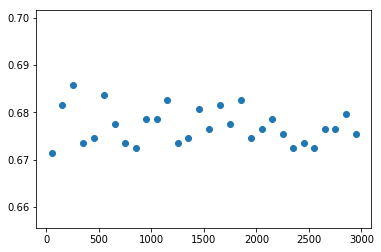

In [26]:
plt.figure()
plt.scatter(points.keys(), points.values())
plt.show()

In [18]:
from sklearn.ensemble import RandomForestClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = list(range(50, 3000, 100))
points_high_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_high_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980

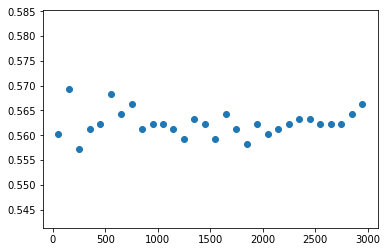

In [20]:
plt.figure()
plt.scatter(points_high_indicators.keys(), points_high_indicators.values())
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['free sulfur dioxide', 'volatile acidity', 'fixed acidity'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = list(range(50, 3000, 100))
points_low_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_low_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980

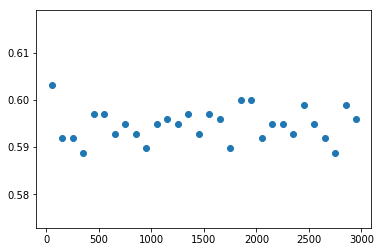

In [24]:
plt.figure()
plt.scatter(points_low_indicators.keys(), points_low_indicators.values())
plt.show()

In [27]:
from sklearn.ensemble import RandomForestClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = list(range(50, 3000, 100))
points_three_indicators = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_three_indicators[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980

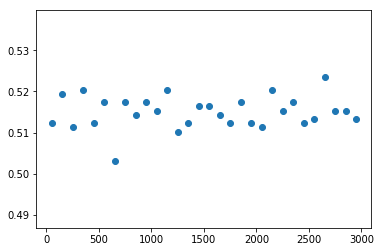

In [28]:
plt.figure()
plt.scatter(points_three_indicators.keys(), points_three_indicators.values())
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier


X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimators = list(range(50, 3000, 100))
points_all = {}
for estimator in estimators:
    ran_fores_clf = RandomForestClassifier(n_estimators=estimator)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    points_all[estimator] = ( np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9])) )/980

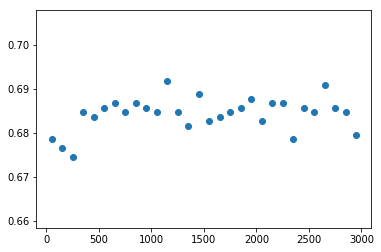

In [30]:
plt.figure()
plt.scatter(points_all.keys(), points_all.values())
plt.show()

1150 estimators seems to be the optimal estimator amount.

In [37]:
points_all[1150]

0.6918367346938775

In [44]:
#max_feature parameter tuning
from sklearn.ensemble import RandomForestClassifier

X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = ['sqrt', 'log2', 'auto']
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features=param)
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For max_feature parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9]))/980) )
    
    

For max_feature parameter 'sqrt' we have score 0.6846938775510204
For max_feature parameter 'log2' we have score 0.6795918367346939
For max_feature parameter 'auto' we have score 0.6857142857142857


The best max_feature parameter is 'auto'.

In [45]:
#criterion parameter tuning

from sklearn.ensemble import RandomForestClassifier

X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = ['gini', 'entropy']
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features='auto', criterion=param )
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For criterion parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9]))/980) )


For criterion parameter 'gini' we have score 0.6816326530612244
For criterion parameter 'entropy' we have score 0.6887755102040817


The best criterion parameter is 'entropy'.

In [46]:
#bootstrap  parameter tuning

from sklearn.ensemble import RandomForestClassifier

X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

parameters = [True, False]
for param in parameters:
    ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features='auto', criterion='entropy', bootstrap=param )
    ran_fores_clf.fit(X_train, y_train)
    y_pred_ran_fores = ran_fores_clf.predict(X_test)
    print( "For bootstrap parameter '" + str(param) + "' we have score " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9]))/980) )


For bootstrap parameter 'True' we have score 0.6877551020408164
For bootstrap parameter 'False' we have score 0.6785714285714286


The best bootstrap parameter is 'True'.

In [51]:
from sklearn.ensemble import RandomForestClassifier

X_initial = white_wine.drop(['quality'], axis=1)
X = X_initial[ ['alcohol', 'density', 'total sulfur dioxide', 'free sulfur dioxide', 'volatile acidity', 'fixed acidity', 'chlorides', 'residual sugar'] ]
y = white_wine['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ran_fores_clf = RandomForestClassifier(n_estimators=1150, max_features='auto', criterion='entropy', bootstrap=True )
ran_fores_clf.fit(X_train, y_train)
y_pred_ran_fores = ran_fores_clf.predict(X_test)
print( "My best classifier yeilds an accuracy of " + str(np.trace(confusion_matrix(y_test, y_pred_ran_fores, labels=[3, 4, 5, 6, 7, 8, 9]))/980) )


My best classifier yeilds an accuracy of 0.6846938775510204
